# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls -la "/content/gdrive/My Drive/darknet"

total 24
drwx------ 2 root root 4096 Jan  9 12:51 bin
drwx------ 2 root root 4096 Jan  9 14:18 cfg
drwx------ 2 root root 4096 Jan  9 12:26 cuDNN
drwx------ 2 root root 4096 Jan  9 13:47 custom
drwx------ 2 root root 4096 Jan  9 14:19 data
drwx------ 2 root root 4096 Jan  9 13:09 weights


In [3]:
!ls -la /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h

ls: cannot access '/usr/local/cuda/targets/ppc64le-linux/include/cudnn.h': No such file or directory


# 2. Install CUDA related modules, cuDNN

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [4]:
!tar -xzvf /content/gdrive/MyDrive/darknet/cuDNN/cudnn-10.1-linux-ppc64le-v8.0.5.39.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h

!cat /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/targets/ppc64le-linux/include/cudnn.h
cuda/targets/ppc64le-linux/include/cudnn_adv_infer.h
cuda/targets/ppc64le-linux/include/cudnn_adv_train.h
cuda/targets/ppc64le-linux/include/cudnn_backend.h
cuda/targets/ppc64le-linux/include/cudnn_cnn_infer.h
cuda/targets/ppc64le-linux/include/cudnn_cnn_train.h
cuda/targets/ppc64le-linux/include/cudnn_ops_infer.h
cuda/targets/ppc64le-linux/include/cudnn_ops_train.h
cuda/targets/ppc64le-linux/include/cudnn_version.h
cuda/targets/ppc64le-linux/NVIDIA_SLA_cuDNN_Support.txt
cuda/targets/ppc64le-linux/lib/libcudnn.so
cuda/targets/ppc64le-linux/lib/libcudnn.so.8
cuda/targets/ppc64le-linux/lib/libcudnn.so.8.0.5
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so.8
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so.8.0.5
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so.8
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so.8.0.5
cuda/targe

## 3. Load DarkNet

In [5]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [6]:
!ls -la '/content/gdrive/My Drive/darknet/bin/darknet'

!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Jan  9 12:52 '/content/gdrive/My Drive/darknet/bin/darknet'


# 4. Test Yolo

In [7]:
!cp -r '/content/gdrive/My Drive/darknet/weights' .
!cp -r '/content/gdrive/My Drive/darknet/cfg' .
!cp -ar '/content/gdrive/My Drive/darknet/data' .
%ls

cp: error reading '/content/gdrive/My Drive/darknet/data/labels/35_0.png': Invalid argument
cp: error reading '/content/gdrive/My Drive/darknet/data/labels/59_6.png': Invalid argument
cfg/  darknet*  data/  weights/


In [8]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

OpenCV exception: load_image_mat_cv 
OpenCV exception: load_image_mat_cv 
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv 

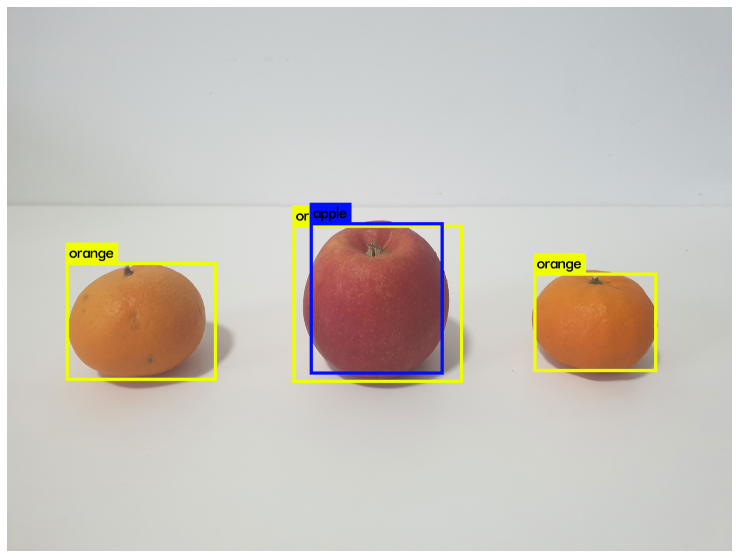

In [18]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/fruit10.jpg
imShow('predictions.jpg')

# 5. Custom Yolo

In [19]:
!cp -r "/content/gdrive/My Drive/darknet/custom" .

In [ ]:
# weights 파일 생성
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg weights/darknet53.conv.74 -dont_show 

In [20]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_last.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [10]:
# weights 파일 별로 mAP 측정
#!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_final.weights

Couldn't open file: custom/custom_data.data


In [11]:
# weights 파일 별로 mAP 측정
#!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_4000.weights

Couldn't open file: custom/custom_data.data


In [ ]:
# weights 파일 별로 mAP 측정
#!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_3000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [17]:
# weights 파일 별로 mAP 측정
#!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_2000.weights

Couldn't open file: custom/custom_data.data


In [13]:
# weights 파일 별로 mAP 측정
#!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_1000.weights

Couldn't open file: custom/custom_data.data


In [ ]:
# 구글 드라이브의 weight 복사 
if os.path.exists('./backup'):
  !cp -r ./backup "/content/gdrive/My Drive/darknet"
if not os.path.exists('./backup'):
  !cp -r "/content/gdrive/My Drive/darknet/backup/custom-train-yolo_final.weights" ./backup

In [28]:
!ls -al ./backup

total 240568
drwxr-xr-x 2 root root      4096 Jan  9 14:52 .
drwxr-xr-x 7 root root      4096 Jan  9 14:41 ..
-rw------- 1 root root 246326928 Jan  9 14:53 custom-train-yolo_final.weights


OpenCV exception: load_image_mat_cv 
OpenCV exception: load_image_mat_cv 
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv 

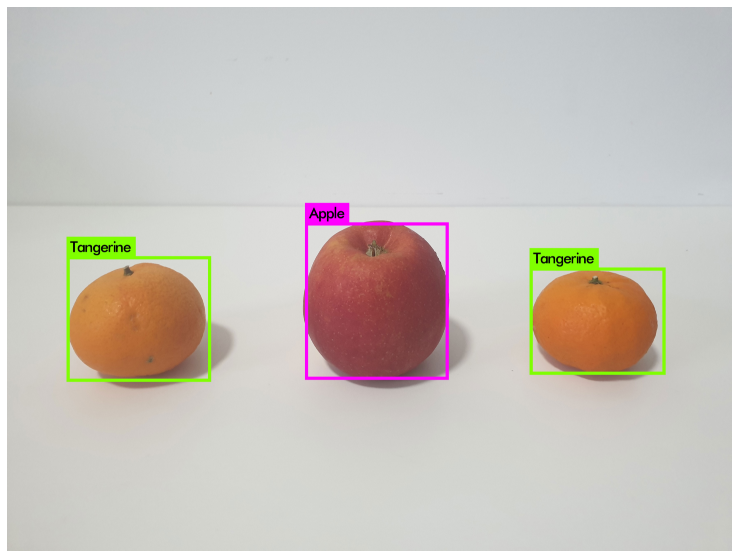

In [29]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_final.weights data/fruit10.jpg -dont-show

imShow('predictions.jpg')